In [ ]:
import pandas as pd
from pandas import np
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
dfmerge = pd.read_csv("/content/gdrive/My Drive/mergeddata.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
dfmerge

,Year,Quarter,Month,DayofMonth,FlightDate,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Dest,Origin,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,time_x,date_x,airport_x,windspeedKmph_y,winddirDegree_y,weatherCode_y,precipMM_y,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,time_y,date_y,airport_y
0,2016,1,1,1,2016-01-01,1400.0,0.0,1354,0.0,10397,11057,1500.0,1505,0.0,0.0,CLT,ATL,17,317,122,0.0,10,1025,100,38,21,48,39,76,1400.0,2016-01-01,ATL,8,298,122,0.0,10,1022,100,42,10,51,49,73,1500.0,2016-01-01,CLT
1,2016,1,1,1,2016-01-01,1600.0,0.0,1535,1.0,10397,11057,1700.0,1648,0.0,0.0,CLT,ATL,17,318,122,0.0,10,1024,100,37,24,48,39,74,1600.0,2016-01-01,ATL,8,294,122,0.0,10,1022,100,42,11,50,48,75,1700.0,2016-01-01,CLT
2,2016,1,1,1,2016-01-01,1800.0,1.0,1740,48.0,10397,11057,1900.0,1852,1.0,36.0,CLT,ATL,17,319,122,0.0,10,1024,100,36,26,45,38,73,1800.0,2016-01-01,ATL,8,294,122,0.0,10,1022,100,41,12,49,47,74,1900.0,2016-01-01,CLT
3,2016,1,1,1,2016-01-01,1100.0,0.0,1040,0.0,10397,11057,1200.0,1157,0.0,0.0,CLT,ATL,17,317,122,0.0,10,1025,100,38,20,45,37,84,1100.0,2016-01-01,ATL,6,108,119,0.0,10,1023,86,41,8,48,46,78,1200.0,2016-01-01,CLT
4,2016,1,1,1,2016-01-01,900.0,0.0,850,2.0,10397,11057,1000.0,1009,0.0,0.0,CLT,ATL,17,319,122,0.0,10,1025,100,39,20,42,35,92,900.0,2016-01-01,ATL,7,48,143,0.0,6,1023,90,42,9,47,44,86,1000.0,2016-01-01,CLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851431,2017,4,12,17,2017-12-17,1900.0,0.0,1930,0.0,14771,14747,2200.0,2143,0.0,0.0,SEA,SFO,6,299,116,0.0,10,1018,1,44,8,64,64,48,1900.0,2017-12-17,SFO,15,205,122,0.0,9,1015,100,42,39,45,38,88,2200.0,2017-12-17,SEA
1851432,2017,4,12,17,2017-12-17,1600.0,0.0,1613,0.0,14771,14747,1800.0,1824,0.0,0.0,SEA,SFO,7,201,113,0.0,10,1017,0,35,10,61,61,38,1600.0,2017-12-17,SFO,12,204,122,0.0,10,1016,100,42,40,44,37,90,1800.0,2017-12-17,SEA
1851433,2017,4,12,17,2017-12-17,2000.0,0.0,2005,0.0,14771,14747,2200.0,2216,0.0,10.0,SEA,SFO,6,262,116,0.0,10,1018,1,47,8,64,64,54,2000.0,2017-12-17,SFO,15,205,122,0.0,9,1015,100,42,39,45,38,88,2200.0,2017-12-17,SEA
1851434,2017,4,12,17,2017-12-17,1800.0,0.0,1715,14.0,14771,14747,2000.0,1927,0.0,3.0,SEA,SFO,6,337,116,0.0,10,1017,1,42,7,65,65,43,1800.0,2017-12-17,SFO,14,204,122,0.0,9,1016,100,42,39,45,38,88,2000.0,2017-12-17,SEA


In [ ]:
dfmerge.describe()

,Year,Quarter,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,time_x,windspeedKmph_y,winddirDegree_y,weatherCode_y,precipMM_y,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,time_y
count,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06,1.851436e+06
mean,2.016494e+03,2.515180e+00,6.544073e+00,1.576746e+01,1.326890e+03,2.009678e-01,1.327428e+03,1.403783e+01,1.273775e+04,1.273823e+04,1.432453e+03,1.496641e+03,2.095984e-01,1.426119e+01,1.230701e+01,1.869324e+02,1.459305e+02,2.557603e-01,9.431139e+00,1.016144e+03,4.254253e+01,4.937289e+01,1.666337e+01,6.530033e+01,6.392989e+01,6.337441e+01,1.326890e+03,1.247606e+01,1.887261e+02,1.453985e+02,2.598770e-01,9.491199e+00,1.016027e+03,4.159901e+01,4.950566e+01,1.690334e+01,6.583746e+01,6.458144e+01,6.249598e+01,1.432453e+03
std,4.999633e-01,1.104736e+00,3.396908e+00,8.790680e+00,5.346987e+02,4.007241e-01,5.115290e+02,4.152727e+01,1.354932e+03,1.354563e+03,5.956147e+02,5.431142e+02,4.070221e-01,4.143587e+01,6.475690e+00,8.682291e+01,6.969844e+01,9.815135e-01,1.838825e+00,6.311455e+00,3.963131e+01,1.614131e+01,8.985794e+00,1.711287e+01,1.900170e+01,2.243274e+01,5.346987e+02,6.439820e+00,8.617213e+01,6.948374e+01,9.985014e-01,1.748177e+00,6.307915e+00,3.932960e+01,1.612049e+01,9.037298e+00,1.707904e+01,1.889954e+01,2.255514e+01,5.956147e+02
min,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.039700e+04,1.039700e+04,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.840000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.810000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00
25%,2.016000e+03,2.000000e+00,4.000000e+00,8.000000e+00,9.000000e+02,0.000000e+00,9.050000e+02,0.000000e+00,1.129800e+04,1.129800e+04,1.000000e+03,1.110000e+03,0.000000e+00,0.000000e+00,7.000000e+00,1.210000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.500000e+01,5.300000e+01,4.800000e+01,9.000000e+02,8.000000e+00,1.240000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.500000e+01,5.400000e+01,4.700000e+01,1.000000e+03
50%,2.016000e+03,3.000000e+00,7.000000e+00,1.600000e+01,1.300000e+03,0.000000e+00,1.316000e+03,0.000000e+00,1.289200e+04,1.289200e+04,1.500000e+03,1.534000e+03,0.000000e+00,0.000000e+00,1.100000e+01,1.950000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.400000e+01,5.100000e+01,1.500000e+01,6.600000e+01,6.600000e+01,6.700000e+01,1.300000e+03,1.200000e+01,1.970000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.300000e+01,5.200000e+01,1.500000e+01,6.700000e+01,6.600000e+01,6.600000e+01,1.500000e+03
75%,2.017000e+03,3.000000e+00,9.000000e+00,2.300000e+01,1.800000e+03,0.000000e+00,1.737000e+03,9.000000e+00,1.393000e+04,1.393000e+04,1.900000e+03,1.938000e+03,0.000000e+00,1.000000e+01,1.600000e+01,2.540000e+02,1.220000e+02,0.000000e+00,1.000000e+01,1.020000e+03,8.400000e+01,6.200000e+01,2.100000e+01,7.800000e+01,7.800000e+01,8.200000e+01,1.800000e+03,1.600000e+01,2.560000e+

### **classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **feature - weather data at origin**

In [ ]:
#taking only the weather data at the origin airport as features
feature_cols = ['windspeedKmph_x', 'winddirDegree_x', 'weatherCode_x', 'precipMM_x', 'visibility_x',
           'pressure_x', 'cloudcover_x', 'DewPointF_x', 'WindGustKmph_x', 'tempF_x',
           'WindChillF_x', 'humidity_x']
X = dfmerge[feature_cols] #X value containing all data from feature columns
y = dfmerge.ArrDel15 #y value containing target variable of arrival delay(0s and 1s)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0.0,0.790786,0.999973,0.883161,366019.000000
1.0,0.411765,0.000072,0.000145,96840.000000
accuracy,0.790772,0.790772,0.790772,0.790772
macro avg,0.601275,0.500022,0.441653,462859.000000
weighted avg,0.711487,0.790772,0.698415,462859.000000


### **oversampling**

In [ ]:
from sklearn.utils import resample

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X = pd.concat([X_train, y_train], axis=1)

In [ ]:
not_delayed = X[X.ArrDel15==0]
delayed = X[X.ArrDel15==1]

In [ ]:
delayed_upsampled = resample(delayed,
                          replace=True, # sample with replacement
                          n_samples=len(not_delayed), # match number in majority class
                          random_state=27)
upsampled = pd.concat([not_delayed, delayed_upsampled])
X = upsampled[feature_cols]
y = upsampled.ArrDel15

### **logisitc reg**

In [ ]:
#logistic regression model implementation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(cnf_matrix)

,0,1
0,172290,101969
1,139192,135423


In [ ]:
#logistic reg report for taking only the weather data at the origin airport as features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.63      0.59    274259
         1.0       0.57      0.49      0.53    274615

    accuracy                           0.56    548874
   macro avg       0.56      0.56      0.56    548874
weighted avg       0.56      0.56      0.56    548874



In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0.0,0.553130,0.628202,0.588280,274259.000000
1.0,0.570462,0.493138,0.528989,274615.000000
accuracy,0.560626,0.560626,0.560626,0.560626
macro avg,0.561796,0.560670,0.558635,548874.000000
weighted avg,0.561801,0.560626,0.558615,548874.000000


### **decision tree**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred =  clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71    274259
         1.0       0.71      0.74      0.72    274615

    accuracy                           0.72    548874
   macro avg       0.72      0.72      0.72    548874
weighted avg       0.72      0.72      0.72    548874



### **extra trees**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 


In [ ]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, 
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(X_train, y_train)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

In [ ]:
X_train.describe()

,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x
count,1.646622e+06,1.646622e+06,1.646622e+06,1.646622e+06,1.646622e+06,1.646622e+06,1.646622e+06,1.646622e+06,1.646622e+06,1.646622e+06,1.646622e+06,1.646622e+06
mean,1.268369e+01,1.883606e+02,1.502848e+02,3.175505e-01,9.404219e+00,1.015811e+03,4.347410e+01,4.980829e+01,1.719331e+01,6.568326e+01,6.432844e+01,6.342468e+01
std,6.616331e+00,8.558570e+01,7.450428e+01,1.123572e+00,1.824445e+00,6.378588e+00,3.966622e+01,1.629421e+01,9.277298e+00,1.743152e+01,1.938865e+01,2.242361e+01
min,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.840000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00
25%,8.000000e+00,1.250000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.900000e+01,1.000000e+01,5.500000e+01,5.400000e+01,4.800000e+01
50%,1.200000e+01,1.970000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.600000e+01,5.200000e+01,1.500000e+01,6.700000e+01,6.600000e+01,6.700000e+01
75%,1.600000e+01,2.540000e+02,1.220000e+02,1.000000e-01,1.000000e+01,1.019000e+03,8.500000e+01,6.200000e+01,2.200000e+01,7.800000e+01,7.800000e+01,8.200000e+01
max,5.900000e+01,3.600000e+02,3.950000e+02,3.050000e+01,2.000000e+01,1.046000e+03,1.000000e+02,8.200000e+01,8.200000e+01,1.210000e+02,1.210000e+02,1.000000e+02


In [ ]:
feature_importance

array([0.08984987, 0.11569714, 0.05305462, 0.04243547, 0.03040917,
       0.09986704, 0.07875989, 0.1007968 , 0.09573017, 0.09448194,
       0.09500984, 0.10390805])

In [ ]:
y_pred = extra_tree_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71    274259
         1.0       0.71      0.74      0.73    274615

    accuracy                           0.72    548874
   macro avg       0.72      0.72      0.72    548874
weighted avg       0.72      0.72      0.72    548874



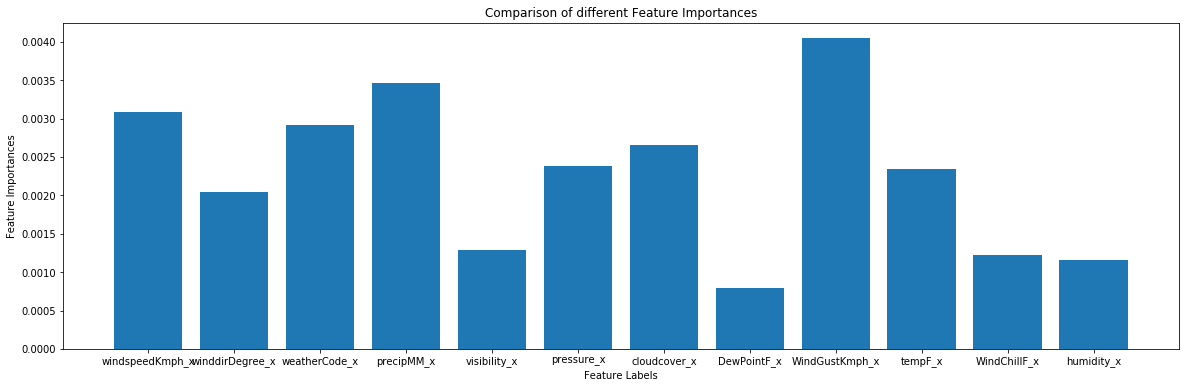

In [ ]:
plt.figure(figsize=(20,6))
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

## **xgboost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0. 1. 1. ... 0. 1. 0.]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.62      0.60    274259
         1.0       0.59      0.54      0.56    274615

    accuracy                           0.58    548874
   macro avg       0.58      0.58      0.58    548874
weighted avg       0.58      0.58      0.58    548874



### **feature col - weather and flight data during departure**

In [ ]:
#classification using selected columns
feature_cols = ['windspeedKmph_x', 'winddirDegree_x', 'weatherCode_x', 'precipMM_x', 'visibility_x',
           'pressure_x', 'cloudcover_x', 'DewPointF_x', 'WindGustKmph_x', 'tempF_x',
           'WindChillF_x', 'humidity_x', "DepTime", "DepDel15", "CRSDepTime","DepDelayMinutes", 
       "OriginAirportID", "DestAirportID"]
X = dfmerge[feature_cols] #X value containing all data from feature columns
y = dfmerge.ArrDel15 #y value containing target variable of arrival delay(0s and 1s)

In [ ]:
#logistic regression model implementation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_test.count()

462859

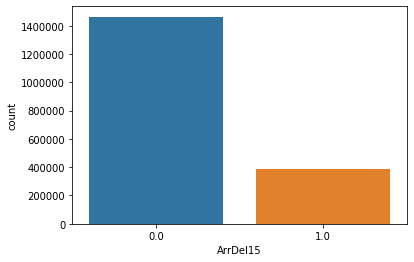

In [ ]:
sns.countplot(x='ArrDel15',data=dfmerge)

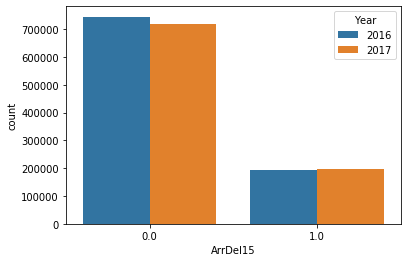

In [ ]:
sns.countplot(x='ArrDel15',data=dfmerge,hue='Year')

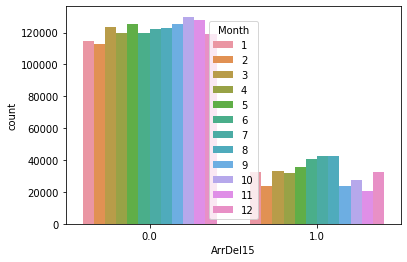

In [ ]:
sns.countplot(x='ArrDel15',data=dfmerge,hue='Month')

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(cnf_matrix)

,0,1
0,357848,8171
1,30762,66078


Text(0.5, 15.0, 'Predicted label')

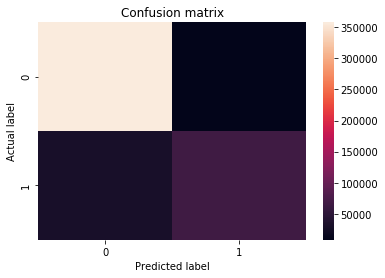

In [ ]:
sns.heatmap(cnf_matrix)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    366019
         1.0       0.89      0.68      0.77     96840

    accuracy                           0.92    462859
   macro avg       0.91      0.83      0.86    462859
weighted avg       0.91      0.92      0.91    462859



### **Decision tree**

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
y_pred =  clf.predict(X_test)

In [ ]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.9995347755291928
Accuracy Score on test data:  0.8677523824750086


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    366019
         1.0       0.68      0.70      0.69     96840

    accuracy                           0.87    462859
   macro avg       0.80      0.81      0.80    462859
weighted avg       0.87      0.87      0.87    462859



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[333486  32533]
 [ 28679  68161]]


### **oversample - trial**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X = pd.concat([X_train, y_train], axis=1)

In [ ]:
X

,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDel15
358523,21,15,332,1.6,5,1026,100,31,34,33,24,94,800.0,0.0,805,5.0,11292,14747,1.0
939961,12,31,113,0.0,10,1025,0,30,14,59,56,34,1100.0,1.0,922,103.0,12892,11292,1.0
278828,12,223,113,0.0,10,1031,1,8,14,28,20,42,700.0,0.0,704,0.0,11292,12478,0.0
151271,14,130,113,0.0,10,1011,0,68,18,86,85,59,2000.0,0.0,2000,0.0,11057,10397,0.0
647241,7,39,119,0.0,10,1021,28,53,9,73,72,49,1100.0,0.0,1050,1.0,12266,12892,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442505,23,109,176,1.8,8,1011,100,52,33,55,53,92,800.0,0.0,811,0.0,13930,14771,0.0
1846243,19,257,113,0.0,10,1014,12,53,21,62,63,70,1100.0,0.0,1105,0.0,14771,14747,0.0
1078673,16,241,176,0.1,10,1012,62,68,18,78,74,82,1500.0,0.0,1435,7.0,12892,14747,0.0
1619661,12,156,293,1.0,7,1013,100,46,14,51,52,78,1100.0,0.0,1120,0.0,14747,12889,0.0


In [ ]:
not_delayed = X[X.ArrDel15==0]
delayed = X[X.ArrDel15==1]

In [ ]:
delayed_upsampled = resample(delayed,
                          replace=True, # sample with replacement
                          n_samples=len(not_delayed), # match number in majority class
                          random_state=27)

In [ ]:
upsampled = pd.concat([not_delayed, delayed_upsampled])

In [ ]:
upsampled.ArrDel15.value_counts()

1.0    1097136
0.0    1097136
Name: ArrDel15, dtype: int64

In [ ]:
X

,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDel15
381064,13,35,122,0.0,10,1026,69,48,15,61,59,65,1300.0,0.0,1250,0.0,11298,10397,0.0
790095,15,241,113,0.0,10,1001,0,28,22,80,82,14,700.0,0.0,710,0.0,12889,10397,0.0
668181,18,101,122,0.0,10,1018,100,49,21,68,68,52,1500.0,0.0,1430,8.0,12266,13930,0.0
733335,12,14,113,0.0,10,1018,0,66,14,74,74,75,800.0,0.0,805,0.0,12478,12892,0.0
1665843,3,162,119,0.1,10,1020,88,59,3,65,64,85,600.0,0.0,605,0.0,14747,14107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838872,17,272,122,0.0,10,1015,57,54,19,64,62,75,1300.0,0.0,1310,8.0,14771,14747,0.0
1743768,15,263,113,0.1,10,1013,16,56,18,67,65,72,1600.0,0.0,1625,2.0,14771,12478,0.0
1555992,9,241,113,0.0,10,1010,0,27,12,88,90,10,1300.0,0.0,1330,0.0,14107,14747,0.0
782659,26,218,113,0.0,10,1019,5,37,37,52,46,58,1300.0,0.0,1255,0.0,12478,14771,0.0


In [ ]:
upsampled

,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDel15
381064,13,35,122,0.0,10,1026,69,48,15,61,59,65,1300.0,0.0,1250,0.0,11298,10397,0.0
790095,15,241,113,0.0,10,1001,0,28,22,80,82,14,700.0,0.0,710,0.0,12889,10397,0.0
668181,18,101,122,0.0,10,1018,100,49,21,68,68,52,1500.0,0.0,1430,8.0,12266,13930,0.0
733335,12,14,113,0.0,10,1018,0,66,14,74,74,75,800.0,0.0,805,0.0,12478,12892,0.0
1665843,3,162,119,0.1,10,1020,88,59,3,65,64,85,600.0,0.0,605,0.0,14747,14107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497289,7,282,113,0.0,10,1019,0,39,8,65,66,34,1700.0,1.0,1620,48.0,14107,12266,1.0
3593,17,253,116,0.1,7,1014,51,69,22,88,88,53,2100.0,1.0,1959,63.0,10397,11057,1.0
1189510,18,72,113,0.0,10,1022,22,56,26,72,74,56,2000.0,1.0,1944,27.0,13204,12478,1.0
1305250,24,217,113,0.0,10,1016,1,73,27,88,90,54,1300.0,0.0,1245,7.0,13930,10397,1.0


In [ ]:
X = upsampled[feature_cols]
y = upsampled.ArrDel15

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(cnf_matrix)

,0,1
0,254777,19548
1,60983,213260


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86    274325
         1.0       0.92      0.78      0.84    274243

    accuracy                           0.85    548568
   macro avg       0.86      0.85      0.85    548568
weighted avg       0.86      0.85      0.85    548568



### **undersample - trial**

In [ ]:
not_delayed_downsampled = resample(not_delayed,
                                replace = False, # sample without replacement
                                n_samples = len(delayed))

In [ ]:
downsampled = pd.concat([not_delayed_downsampled, delayed])

In [ ]:
downsampled

,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDel15
503063,11,97,113,0.0,10,1019,10,58,12,76,75,64,1100.0,1.0,1055,23.0,11618,10397,0.0
1128048,9,77,122,0.0,10,1017,72,63,13,70,70,83,800.0,0.0,820,2.0,13204,10397,0.0
813868,15,351,113,0.0,10,1022,0,20,18,61,63,39,600.0,0.0,615,0.0,12889,11298,0.0
1071647,5,131,113,0.0,10,1011,26,54,6,70,70,58,800.0,0.0,800,0.0,12892,14107,0.0
711177,36,170,122,0.0,9,1011,85,65,65,67,67,93,900.0,0.0,933,0.0,12478,12889,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711985,19,265,113,0.1,10,1015,20,55,20,65,64,76,1800.0,0.0,1735,10.0,14771,11298,1.0
1119439,9,185,113,0.0,10,1012,0,67,10,86,86,54,1100.0,0.0,1120,5.0,12892,14771,1.0
1062725,9,203,119,0.1,10,1012,71,62,10,67,66,86,2000.0,1.0,1855,34.0,12892,14107,1.0
1760023,14,274,116,0.0,10,1010,23,56,17,70,68,69,1700.0,1.0,1610,53.0,14771,12889,1.0


In [ ]:
downsampled.ArrDel15.value_counts()

1.0    291389
0.0    291389
Name: ArrDel15, dtype: int64

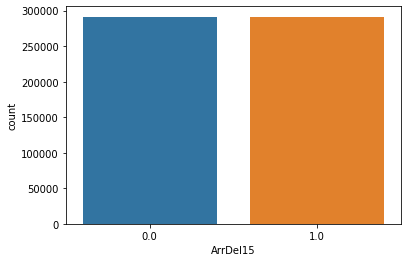

In [ ]:
sns.countplot(x='ArrDel15',data=downsampled)

In [ ]:
X = downsampled[feature_cols]
y = downsampled.ArrDel15

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(cnf_matrix)

,0,1
0,67434,5208
1,16308,56745


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
X_test